In [1]:
%%capture

%cd ..
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from heatmap import heatmap, corrplot
import itertools

sns.set()

pd.set_option('expand_frame_repr', True)
pd.set_option('display.column_space', 6)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.show_dimensions', True)

# Análise Exploratória

## Carregamento dos Dados

In [3]:
PROCESSED_DATA_FOLDER = Path('data/processed/')
data_df = pd.read_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned_normalized.csv", index_col=0)
data_df["class"] = data_df["class"].astype('category')

## Correlação

In [4]:
REPORTS_PATH = Path("reports/figures")
# SAVEFIG_FOLDER = REPORTS_PATH / "boxplots"
# SAVEFIG_FOLDER.mkdir(exist_ok=True, parents=Tru

In [5]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("Top Absolute Correlations")
corr_data = get_top_abs_correlations(data_df[CONTINUOUS_VARIABLES], 10)

Top Absolute Correlations


In [6]:
# corr_data[corr_data > 0].sort_values(ascending=False)[0:10]
corr_data[corr_data > 0].sort_values(ascending=True)[0:10]

percent_adjectives                      pausality                                 0.000137
percent_upper_words                     pausality                                 0.000677
percent_adjectives                      percent_subjuntive_imperative_verbs       0.002150
percent_plural_first_personal_pronouns  pausality                                 0.006244
percent_verbs                           percentage_spelling_errors                0.008314
percent_adverbs                         percent_links_inside                      0.013394
percent_modal_verbs                     average_word_lenght                       0.013569
percent_adjectives                      percent_plural_first_personal_pronouns    0.013780
pausality                               emotiveness                               0.016068
percent_modal_verbs                     percent_plural_first_personal_pronouns    0.016475
Length: 10, dtype: float64

In [7]:
# corr_data[corr_data < 0].sort_values(ascending=True)[0:10]
corr_data[corr_data < 0].sort_values(ascending=False)[0:10]

percent_subjuntive_imperative_verbs              percent_upper_words          -0.003268
percent_adjectives                               percent_pronouns             -0.004943
percent_singular_first_second_personal_pronouns  percentage_spelling_errors   -0.006904
percent_plural_first_personal_pronouns           percentage_spelling_errors   -0.007092
percent_singular_first_second_personal_pronouns  pausality                    -0.013961
average_word_lenght                              percentage_spelling_errors   -0.020061
percent_pronouns                                 pausality                    -0.020437
average_word_lenght                              diversity                    -0.022017
percent_links_inside                             average_word_lenght          -0.022185
percent_upper_words                              percentage_spelling_errors   -0.022266
Length: 10, dtype: float64

In [ ]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]
fig = plt.figure(figsize=(20, 20))
corrplot(data_df[CONTINUOUS_VARIABLES].corr(), size_scale=1000, marker='o')
fig.axes[0].tick_params(axis="x", labelsize=20)
fig.axes[0].tick_params(axis="y", labelsize=20)
fig.axes[1].tick_params(axis="x", labelsize=20)
fig.axes[1].tick_params(axis="x", labelsize=20)
fig.savefig(REPORTS_PATH/'correlation_matrix.png', dpi=100)

REPORTS_PATH = Path("reports/figures")
# SAVEFIG_FOLDER = REPORTS_PATH / "boxplots"
# SAVEFIG_FOLDER.mkdir(exist_ok=True, parents=True)


## Scatter pLot

In [ ]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]
combinations = [(x,y) for x in CONTINUOUS_VARIABLES for y in CONTINUOUS_VARIABLES]
SAVEFIG_FOLDER = REPORTS_PATH / "scatterplots"
SAVEFIG_FOLDER.mkdir(exist_ok=True, parents=True)

for col1, col2 in combinations:
    sns.jointplot(x=col1, y=col2, hue='class', data=data_df)
    plt.savefig(SAVEFIG_FOLDER/f'{col1}-{col2}.png')
    plt.close()

plt.show()

## Distribuições

In [ ]:
en(plot_data_df.columns)

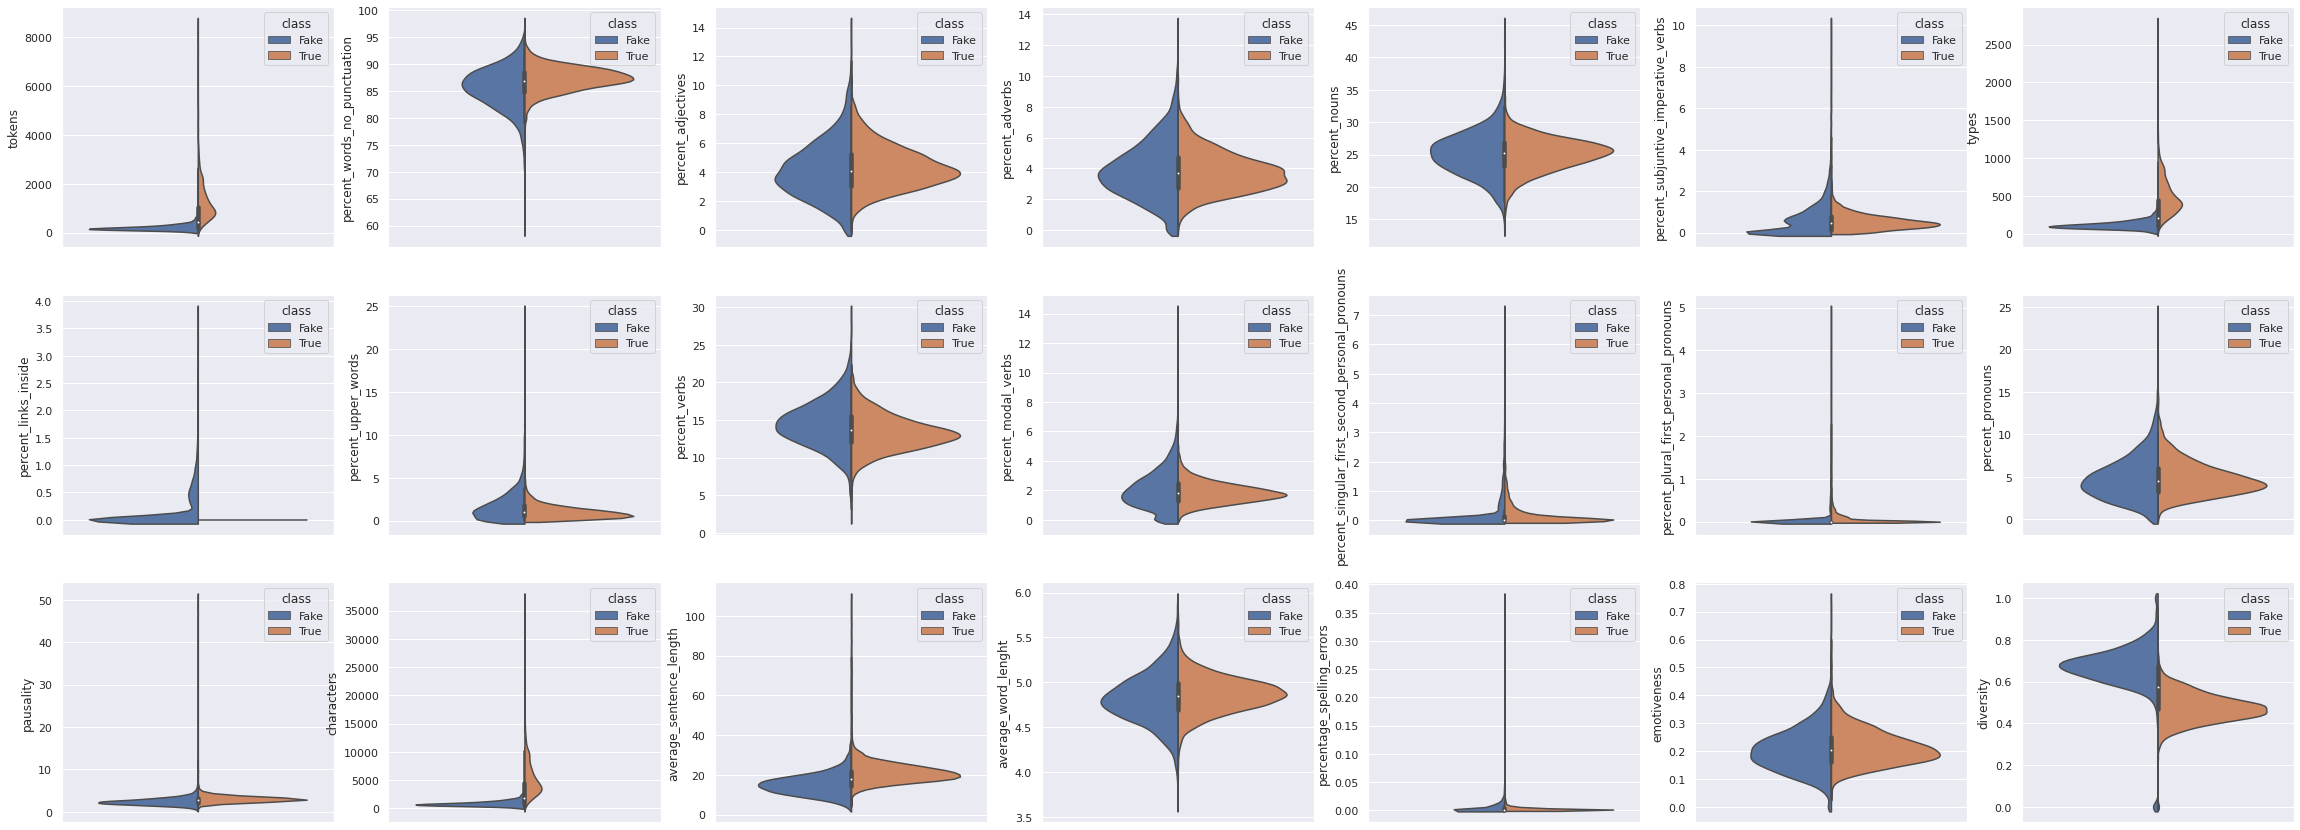

In [8]:
plot_data_df = data_df.copy()
plot_data_df["all"] = ""

CONTINUOUS_VARIABLES = [x for x, y in plot_data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]

fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(40, 15), sharex=False, sharey=False)
for col, ax in zip(CONTINUOUS_VARIABLES, axes.flat):
    sns.violinplot(x="all", data=plot_data_df, y=col, hue='class', cut=True, split=True, ax=ax, vars=plot_data_df.columns)
    ax.set_xlabel("")
    
SAVEFIG_FOLDER = REPORTS_PATH 
plt.savefig(SAVEFIG_FOLDER/'allviolinplots_normalized.png')
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(25, 75), sharex=False, sharey=False)
plot_data_df = data_df.copy()
plot_data_df["all"] = ""

for col, ax in zip(CONTINUOUS_VARIABLES, axes.flat):
    sns.violinplot(x="all", data=plot_data_df, y=col, hue='class', cut=True, split=True, ax=ax, vars=data_df.columns)
    sns.stripplot(x="all", data=plot_data_df, y=col, hue='class', alpha=.1, ax=ax)
    ax.set_xlabel("")

plt.show()

## Word Cloud

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
list_of_words_fake = ' '.join(list(data_df[data_df["class"] == 'Fake'].text))
list_of_words_fake = [word for word in list_of_words_fake.split(" ") if word not in nltk.corpus.stopwords.words('portuguese')]

In [ ]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]
combinations = [(x,y) for x in CONTINUOUS_VARIABLES for y in CONTINUOUS_VARIABLES]
SAVEFIG_FOLDER = REPORTS_PATH / "scatterplots"
SAVEFIG_FOLDER.mkdir(exist_ok=True, parents=True)

for col1, col2 in combinations:
    sns.jointplot(x=col1, y=col2, hue='class', data=data_df)
    plt.savefig(SAVEFIG_FOLDER/f'{col1}-{col2}.png')
    plt.close()

plt.show()

In [ ]:
from wordcloud import WordCloud
SAVEFIG_FOLDER = REPORTS_PATH
wordcloud = WordCloud(max_words=1000, background_color="white").generate(" ".join(list_of_words_fake))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file(SAVEFIG_FOLDER/'wordcloudfake.png')

In [ ]:
list_of_words_true = ' '.join(list(data_df[data_df["class"] == 'True'].text))
list_of_words_true = [word for word in list_of_words_true.split(" ") if word not in nltk.corpus.stopwords.words('portuguese')]

In [ ]:
from wordcloud import WordCloud
SAVEFIG_FOLDER = REPORTS_PATH
wordcloud = WordCloud(max_words=1000, background_color="white").generate(" ".join(list_of_words_true))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file(SAVEFIG_FOLDER/'wordcloudtrue.png')